<a href="https://colab.research.google.com/github/tushargupta26/Facial-Emotes-recognition/blob/main/Facial_Emotions_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/muxspace/facial_expressions

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214
Receiving objects: 100% (14214/14214), 239.65 MiB | 34.04 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (13996/13996), done.


In [ ]:
import csv
data = {}
with open ('/content/facial_expressions/data/legend.csv') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    key = row[2].lower()
    if key in data:
      data[key].append(row[1])
    else:
      data[key] = [row[1]]

In [ ]:
emotion_list = list(data.keys())
emotion_list

['anger',
 'surprise',
 'disgust',
 'fear',
 'neutral',
 'happiness',
 'sadness',
 'contempt']

In [ ]:
import os

os.mkdir('master_data')
os.mkdir('master_data/training')
os.mkdir('master_data/testing')

In [ ]:
for emotion in emotion_list:
  os.mkdir(os.path.join('master_data/training/', emotion))
  os.mkdir(os.path.join('master_data/testing/', emotion))

In [ ]:
from shutil import copyfile
split_size = 0.8

for emotion, images in data.items():
  train_size = int(split_size * len(images))
  train_images = images[:train_size]
  test_images = images[train_size:]
  for image in train_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/training', emotion, image)
    copyfile(source, dest)
  for image in test_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/testing', emotion, image)
    copyfile(source, dest)

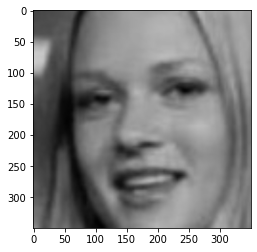

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
# train_path='/content/drive/MyDrive/Colab Notebooks/ASL/asl_alphabet_train'
#os.listdir(train_path+'/A')
img=cv2.imread('/content/facial_expressions/images/AJ_Cook_0001.jpg')
plt.imshow(img)

In [ ]:
img.shape

(350, 350, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = tf.keras.models.Sequential([
      Conv2D(16, [3,3], activation = 'relu', input_shape =[100, 100, 3] ),
      MaxPooling2D(2,2),
      Conv2D(32, [3,3], activation = 'relu' ),
      MaxPooling2D(2,2),
      Conv2D(64, [3,3], activation = 'relu' ),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(1000, activation = 'relu'),
      Dense(8, activation = 'softmax')
])

model.compile(optimizer = Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_dir = '/content/master_data/training'
test_dir = '/content/master_data/testing'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
                                                  train_dir,
                                                  target_size = (100,100),
                                                  class_mode = "categorical",
                                                  batch_size = 128
)
test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size = (100,100),
                                                  class_mode = 'categorical',
                                                  batch_size = 128
)

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [ ]:
test_generator

In [ ]:
es = EarlyStopping(monitor='val_acc', patience=2, min_delta=0.01)


In [ ]:
model.fit_generator(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data = test_generator,
                    callbacks = [es]
                    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
86/86 [==============================] - 47s 183ms/step - loss: 1.9362 - accuracy: 0.4863 - val_loss: 1.0259 - val_accuracy: 0.5011
Epoch 2/10
86/86 [==============================] - 16s 182ms/step - loss: 1.0004 - accuracy: 0.5580 - val_loss: 1.0103 - val_accuracy: 0.5591
Epoch 3/10
86/86 [==============================] - 15s 180ms/step - loss: 0.8423 - accuracy: 0.6969 - val_loss: 0.9544 - val_accuracy: 0.6426
Epoch 4/10
86/86 [==============================] - 15s 176ms/step - loss: 0.7629 - accuracy: 0.7327 - val_loss: 1.0590 - val_accuracy: 0.5864
Epoch 5/10
86/86 [==============================] - 15s 177ms/step - loss: 0.7551 - accuracy: 0.7296 - val_loss: 0.9806 - val_accuracy: 0.6222
Epoch 6/10
86/86 [==============================] - 15s 174ms/step - loss: 0.6918 - accuracy: 0.7603 - val_loss: 1.0536 - val_accuracy: 0.6236
Epoch 7/10
86/86 [==============================] - 15s 179ms/step - loss: 0.6790 - accuracy: 0.7658 - val_loss: 1.0492 - val_accuracy: 0.6342